### Projecto de seaborn y matplotlib

In [30]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import pandas as pd
from matplotlib.gridspec import GridSpec

En este proyecto se analizaran los datos de un torneo del videojuego League Of Legends y analizaremos que podemos encontrar

In [31]:
datos= pd.read_csv('LEC_SpringPlayoffs_2024.csv')


Primeros analizaremos el total del tiempo por cada partida para cada día de la competición. Mi hipótesis es que a medida que se acercan a los últimos días el tiempo aumenta debido a la presión, nervios, y tratar de jugar con más seguridad. También espero que pase esto a medida que se sube en las rondas. Para comprobar esto realizaremos un filtro de las columnas que necesitamos


In [32]:
def tiempo(time):
    horas,minutos, segundos = time.split(':')
    minutos_totales = int(horas)*60 + int(minutos) + int(segundos) / 60 
    return minutos_totales



filtro=datos[['Day','Time']].copy() # Filtramos los datos
filtro_round=datos[['Round','Time']].copy()

# Aplicams la funcion de tiempo

filtro['Time']= filtro['Time'].apply(tiempo) # Aplicamos la funcion a la columna Time

filtro_round['Time']= filtro_round['Time'].apply(tiempo) # Aplicamos la funcion a la columna Time

numero_dias= filtro['Day'].value_counts() # Contamos cuantas partidas se juega por dias 

numero_rondas=filtro_round['Round'].value_counts()
# Creamos un DF para un boxplot 

df_boxplot=filtro

#Creamos el filtro para el barplot
filtro_bar=filtro.groupby('Day')['Time'].sum() / numero_dias # Realizamos la division 
filtro_round=filtro_round.groupby('Round')['Time'].sum() / numero_rondas

In [34]:
filtro_bar = filtro_bar.reset_index()
filtro_bar.columns = ['Day', 'Time']

filtro_round=filtro_round.reset_index()
filtro_round.columns = ['Round', 'Time']

filtro_bar.head(2)

,Day,Time
0,1,30.990000
1,2,29.979167


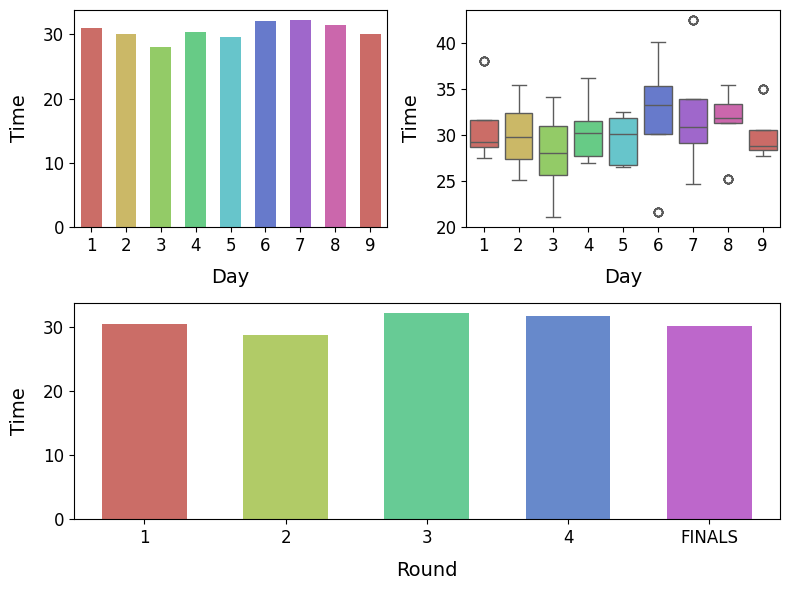

In [38]:
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, height_ratios=[1, 1])

# Gráfico de barras en la primera celda
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=filtro_bar.reset_index(), x='Day', y='Time', palette='hls', hue='Day', width=0.6, ax=ax1, legend=False)
ax1.set_xlabel('Day', fontsize=14, labelpad=10)
ax1.set_ylabel('Time', fontsize=14, labelpad=10)
ax1.tick_params(axis='both', labelsize=12)

# Gráfico de cajas en la segunda celda
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=df_boxplot, x='Day', y='Time', palette='hls', hue='Day', ax=ax2, legend=False)
ax2.set_xlabel('Day', fontsize=14, labelpad=10)
ax2.set_ylabel('Time', fontsize=14, labelpad=10)
ax2.tick_params(axis='both', labelsize=12)

# Gráfico de barras que ocupa toda la segunda fila
ax3 = fig.add_subplot(gs[1, :])
sns.barplot(data=filtro_round, x='Round', y='Time', palette='hls', hue='Round', width=0.6, ax=ax3, legend=False)
ax3.set_xlabel('Round', fontsize=14, labelpad=10)
ax3.set_ylabel('Time', fontsize=14, labelpad=10)
ax3.tick_params(axis='both', labelsize=12)

# Ajustar el layout
plt.tight_layout()
plt.show()

Como se puede observar en los gráficos mi hipótesis era incorrecta, ya que al menos en promedio, las partidas en todos los días y rondas tienen una duración de 30 minutos. Sin embargo, en el boxplot se puede apreciar que el día 9 fue el día con la caja más pequeña y sin fuertes variaciones. Esto podría manifestar una modalidad de juego con estrategias claras en las partidas. Es importante observar que además en el día 3, el que menor promedio presento, también es el que tiene las variaciones mas grandes en los tiempos de juegos

## Segundo analisis

Como segundo análisis haremos un scatter plot de la posición del jugador y el número de kills, y haremos la segmentación por equipos. De esta manera veremos que tan disparejos están. esto se hará para cada ronda del juego y veremos si la tendencia se mantiene a medida que los equipos avanzan a la final

In [58]:
## Preparacion de los datos 

analisis= datos[['Round','Team','Kills','Role']]

analisis

,Round,Team,Kills,Role
0,1,VIT,2,TOP
1,1,VIT,2,JUNGLE
2,1,VIT,3,MID
3,1,VIT,0,ADCARRY
4,1,VIT,1,SUPPORT
...,...,...,...,...
415,FINALS,G2,6,TOP
416,FINALS,G2,6,JUNGLE
417,FINALS,G2,4,MID
418,FINALS,G2,17,ADCARRY


c:\Users\Sebastian Hurtado\anaconda3\envs\Entorno_3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Sebastian Hurtado\anaconda3\envs\Entorno_3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


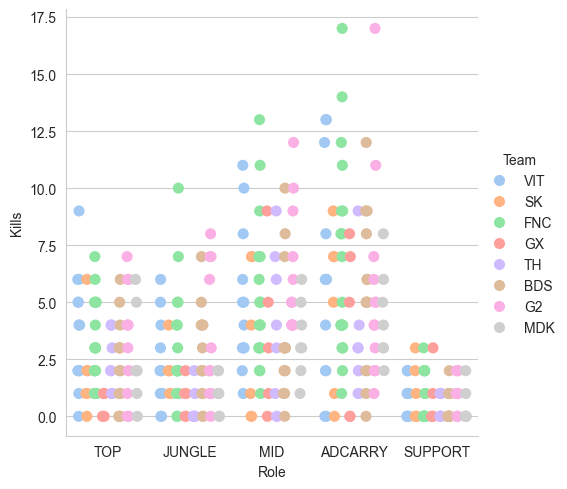

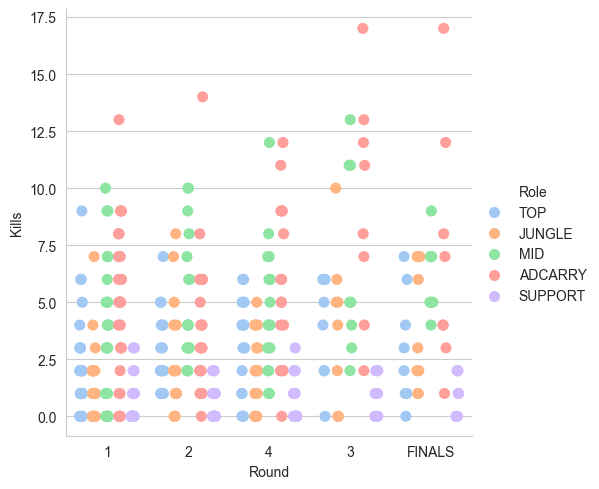

In [79]:

sns.set_style("whitegrid")

sns.catplot(data=analisis,x='Role',y='Kills',hue='Team',palette='pastel',dodge=True,size=8)
sns.catplot(data=analisis,x='Round',y='Kills',hue='Role',palette='pastel',dodge=True,size=8)


<Axes: xlabel='Round', ylabel='Kills'>

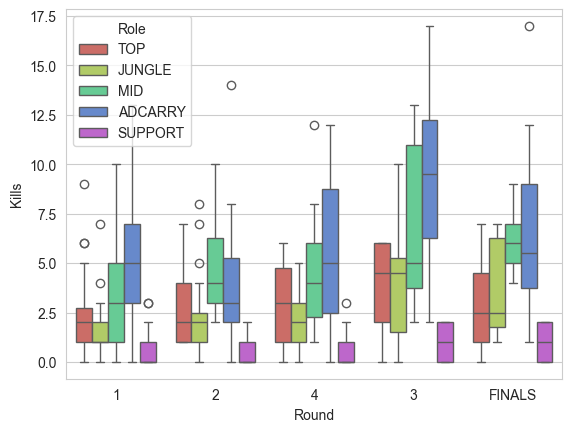

In [82]:
sns.boxplot(data=analisis, x='Round', y='Kills', palette='hls', hue='Role')

Como se puede observar en las gráficas las posiciones que mas presentaron kills fueron las de MID y los AD Carry. Siendo los equipos más sobresalientes FNC G2 y VIT.  Es curioso notar que en las rondas 3 y 4 el número de kill fue considerablemente altas mientras que en la ronda final solo el AD carry fue el más sobresaliente, lo que podría significar que este fue quien carreo la final

c:\Users\Sebastian Hurtado\anaconda3\envs\Entorno_3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


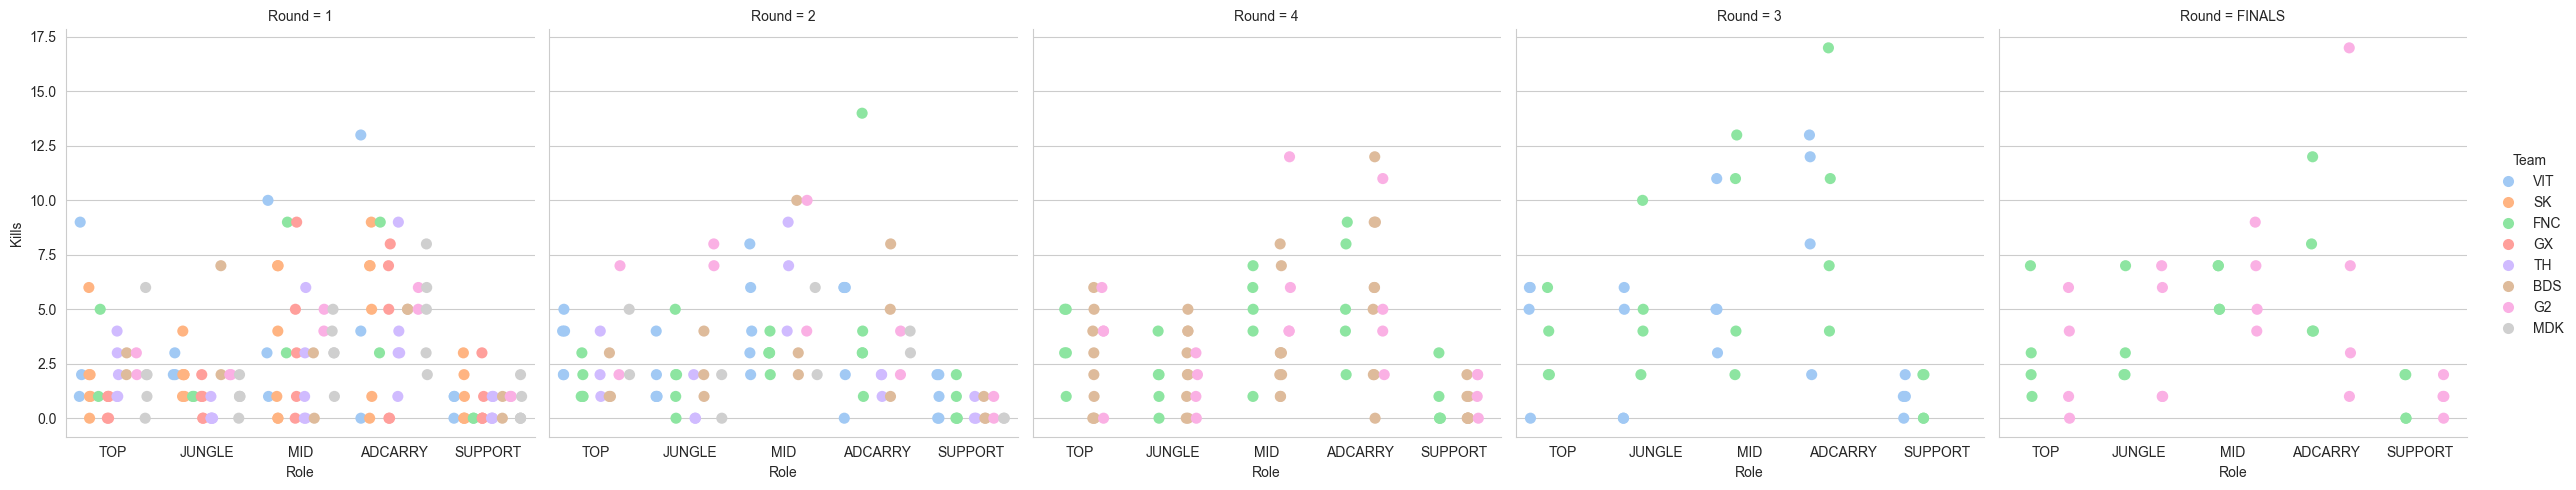

In [83]:
sns.catplot(data=analisis,x='Role',y='Kills',hue='Team',palette='pastel',dodge=True,size=8,col='Round')

En esta grafica no solo podemos apreciar cómo fueron siendo eliminados los equipos hasta llegar a la final, además del desempeño de cada uno de los roles en la competición.  Para análisis futuros se puede analizar solo esto dos equipos y ver cómo fue su desempeño en cada ronda. Falta además por tener en cuenta otros factores, como el desempeño de cada jugador por posición, con el objetivo de poder hacer un "dream-team".